In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import dask
import xesmf as xe
import proplot as pplt
import cartopy.feature as cfeature
import xskillscore as xs

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plotCompLRP850(ds_tmp,ds_comp,file=''):

    lon_0=290
    levs_lrp=np.arange(0.3,0.8,0.1)
    
    for seas in ['DJF','JJA']:
    
        f, axs = pplt.subplots(ncols=2, nrows=1,
                               proj=['npstere','npstere'],
                               proj_kw={'lon_0': lon_0},
                               width=11,height=8.5)

        for i,v in enumerate(['z850','u850']):

            m=axs[0,i].pcolormesh(ds_tmp['lon'],ds_tmp['lat'],
                                  ds_tmp.sel(seas=seas,var=v),cmap='grays',
                                  extend='both',levels=levs_lrp)
            axs[0,i].format(coast=True,grid=True,
                            title=seas+' '+v.upper(),
                            abc=False,titleweight='bold',
                            titlesize=12)

        f.colorbar(m,loc='b',length=0.7,label='Relevance')
        f.save('../figs/lrpcirc850.'+seas+'.jpg')

In [3]:
def plotCompCirc850(ds_tmp,ds_comp,file=''):

    lon_0=290
    levs_z850=np.arange(-700,800,100)
    levs_u850=np.arange(-5,5,1)
    levs_lrp=np.arange(0.3,0.8,0.1)
    

    for seas in ['DJF','JJA']:
    
        f, axs = pplt.subplots(ncols=2, nrows=1,
                               proj=['npstere','npstere'],
                               proj_kw={'lon_0': lon_0},
                               width=11,height=8.5)

        for i,(v,levs) in enumerate(zip(['z850','u850'],[levs_z850,levs_u850])):

            m=axs[0,i].pcolormesh(ds_tmp['lon'],ds_tmp['lat'],
                                  ds_tmp.sel(seas=seas,var=v),cmap='grays',
                                  extend='both',levels=levs_lrp)
            axs[0,i].format(coast=True,grid=True,
                            title=seas+' '+v.upper(),
                            abc=False,titleweight='bold',
                            titlesize=12)
            
            axs[0,i].contour(ds_comp['lon'],ds_comp['lat'],
                             ds_comp[v].sel(seas=seas),
                             levels=levs,cmap='BR')

            axs[0,i].format(coast=True,grid=True,
                            title=seas+' '+v.upper(),
                            abc=False,titleweight='bold',
                            titlesize=12)

        f.colorbar(m,loc='b',length=0.7,label='Relevance')

        f.save('../figs/compcirc850.'+seas+'.jpg')

### Read in Model Output

fnames_indices='../data/fnn/model_output.*.nc'
ds_model_indices=xr.open_mfdataset(fnames_indices,combine='nested',concat_dim='seas')
ds_model_indices['seas']=['DJF','JJA']
ds_model_indices

### Read in Target

ds_target_tval=xr.open_dataset('../data/cnn/target_trainval.nc')
ds_target_test=xr.open_dataset('../data/cnn/target_test.nc')
ds_target=xr.combine_by_coords([ds_target_tval,ds_target_test])

### Figures 8, 9, 10, 11: Composites of Confident, Correct Forecasts

#### Read in Composite Data

In [4]:
ifname_lrp='../data/cnn/model_lrpcomp.*.cnn_cat.nc'
ifname_comp='../data/cnn/model_anomscomp.*.cnn_cat.nc'
    
ds_lrp=xr.open_mfdataset(ifname_lrp,combine='nested',concat_dim='seas')
ds_comp=xr.open_mfdataset(ifname_comp,combine='nested',concat_dim='seas')

ds_lrp['seas']=['DJF','JJA']
ds_comp['seas']=['DJF','JJA']

#### Normalize LRP by max value over all gridpoints and variables

In [5]:
lrp_norm=ds_lrp/ds_lrp.max(dim=['lat','lon','var'])

### Plot Composite Fields and LRP

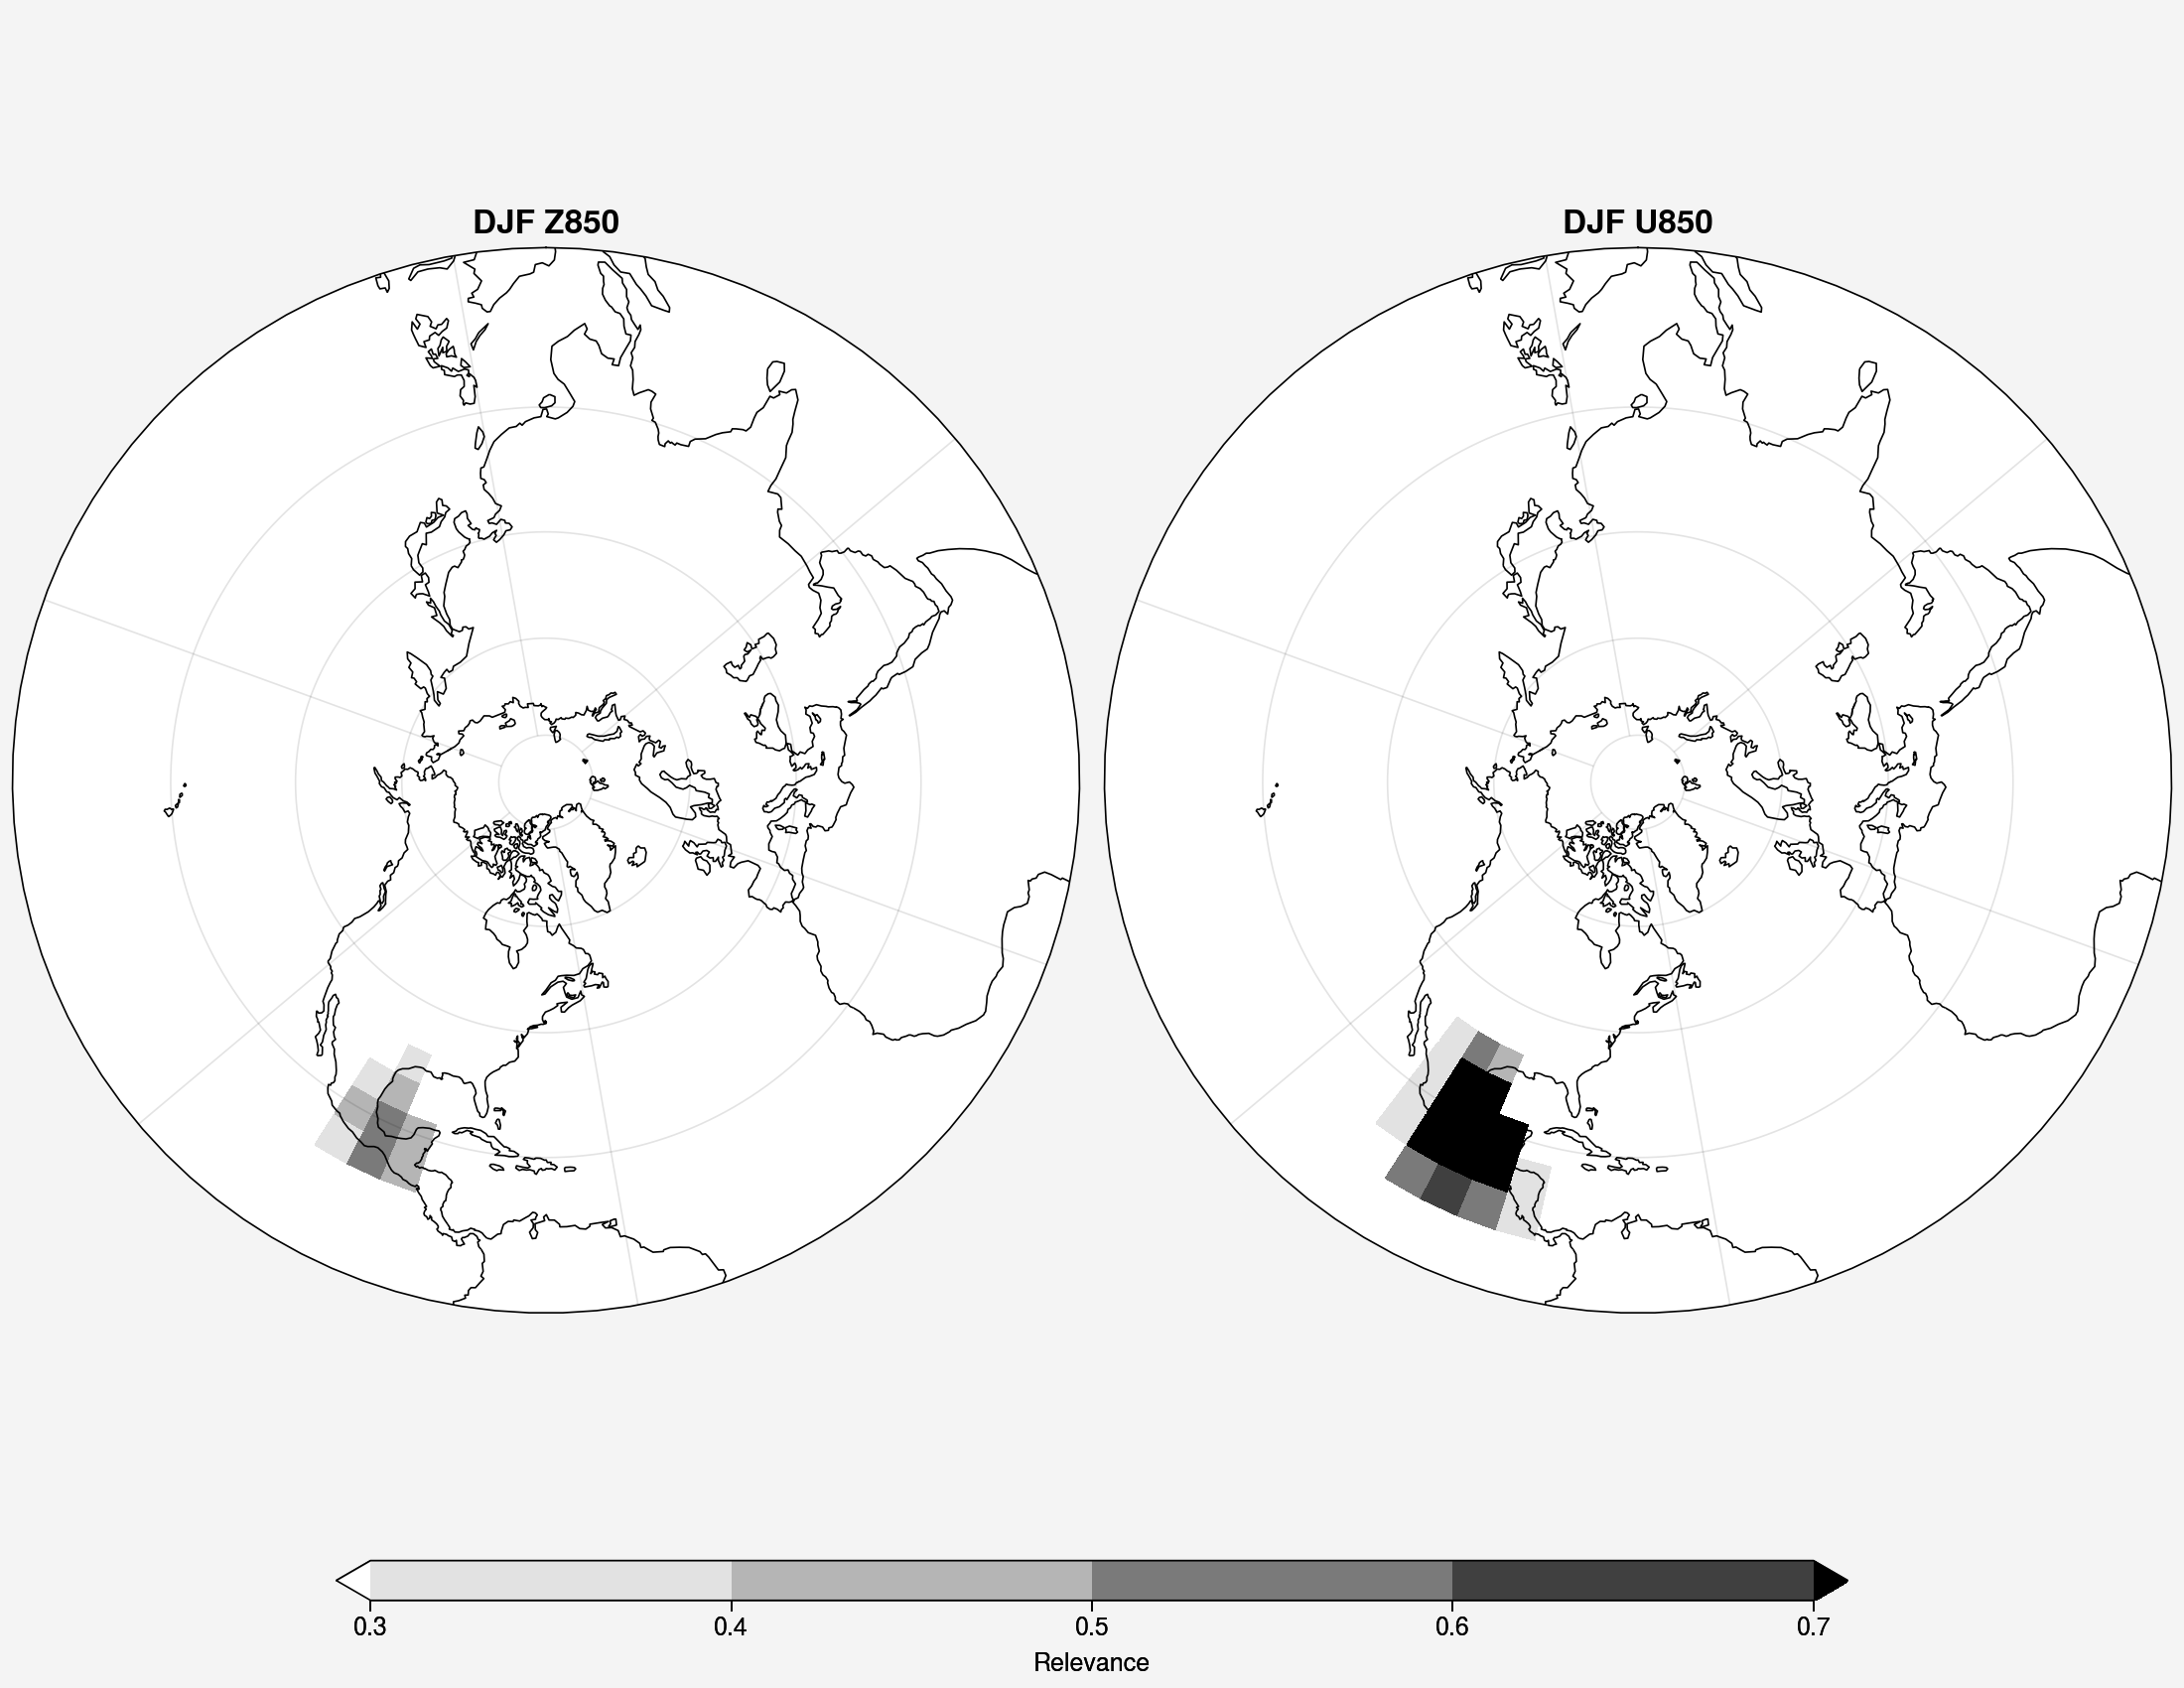

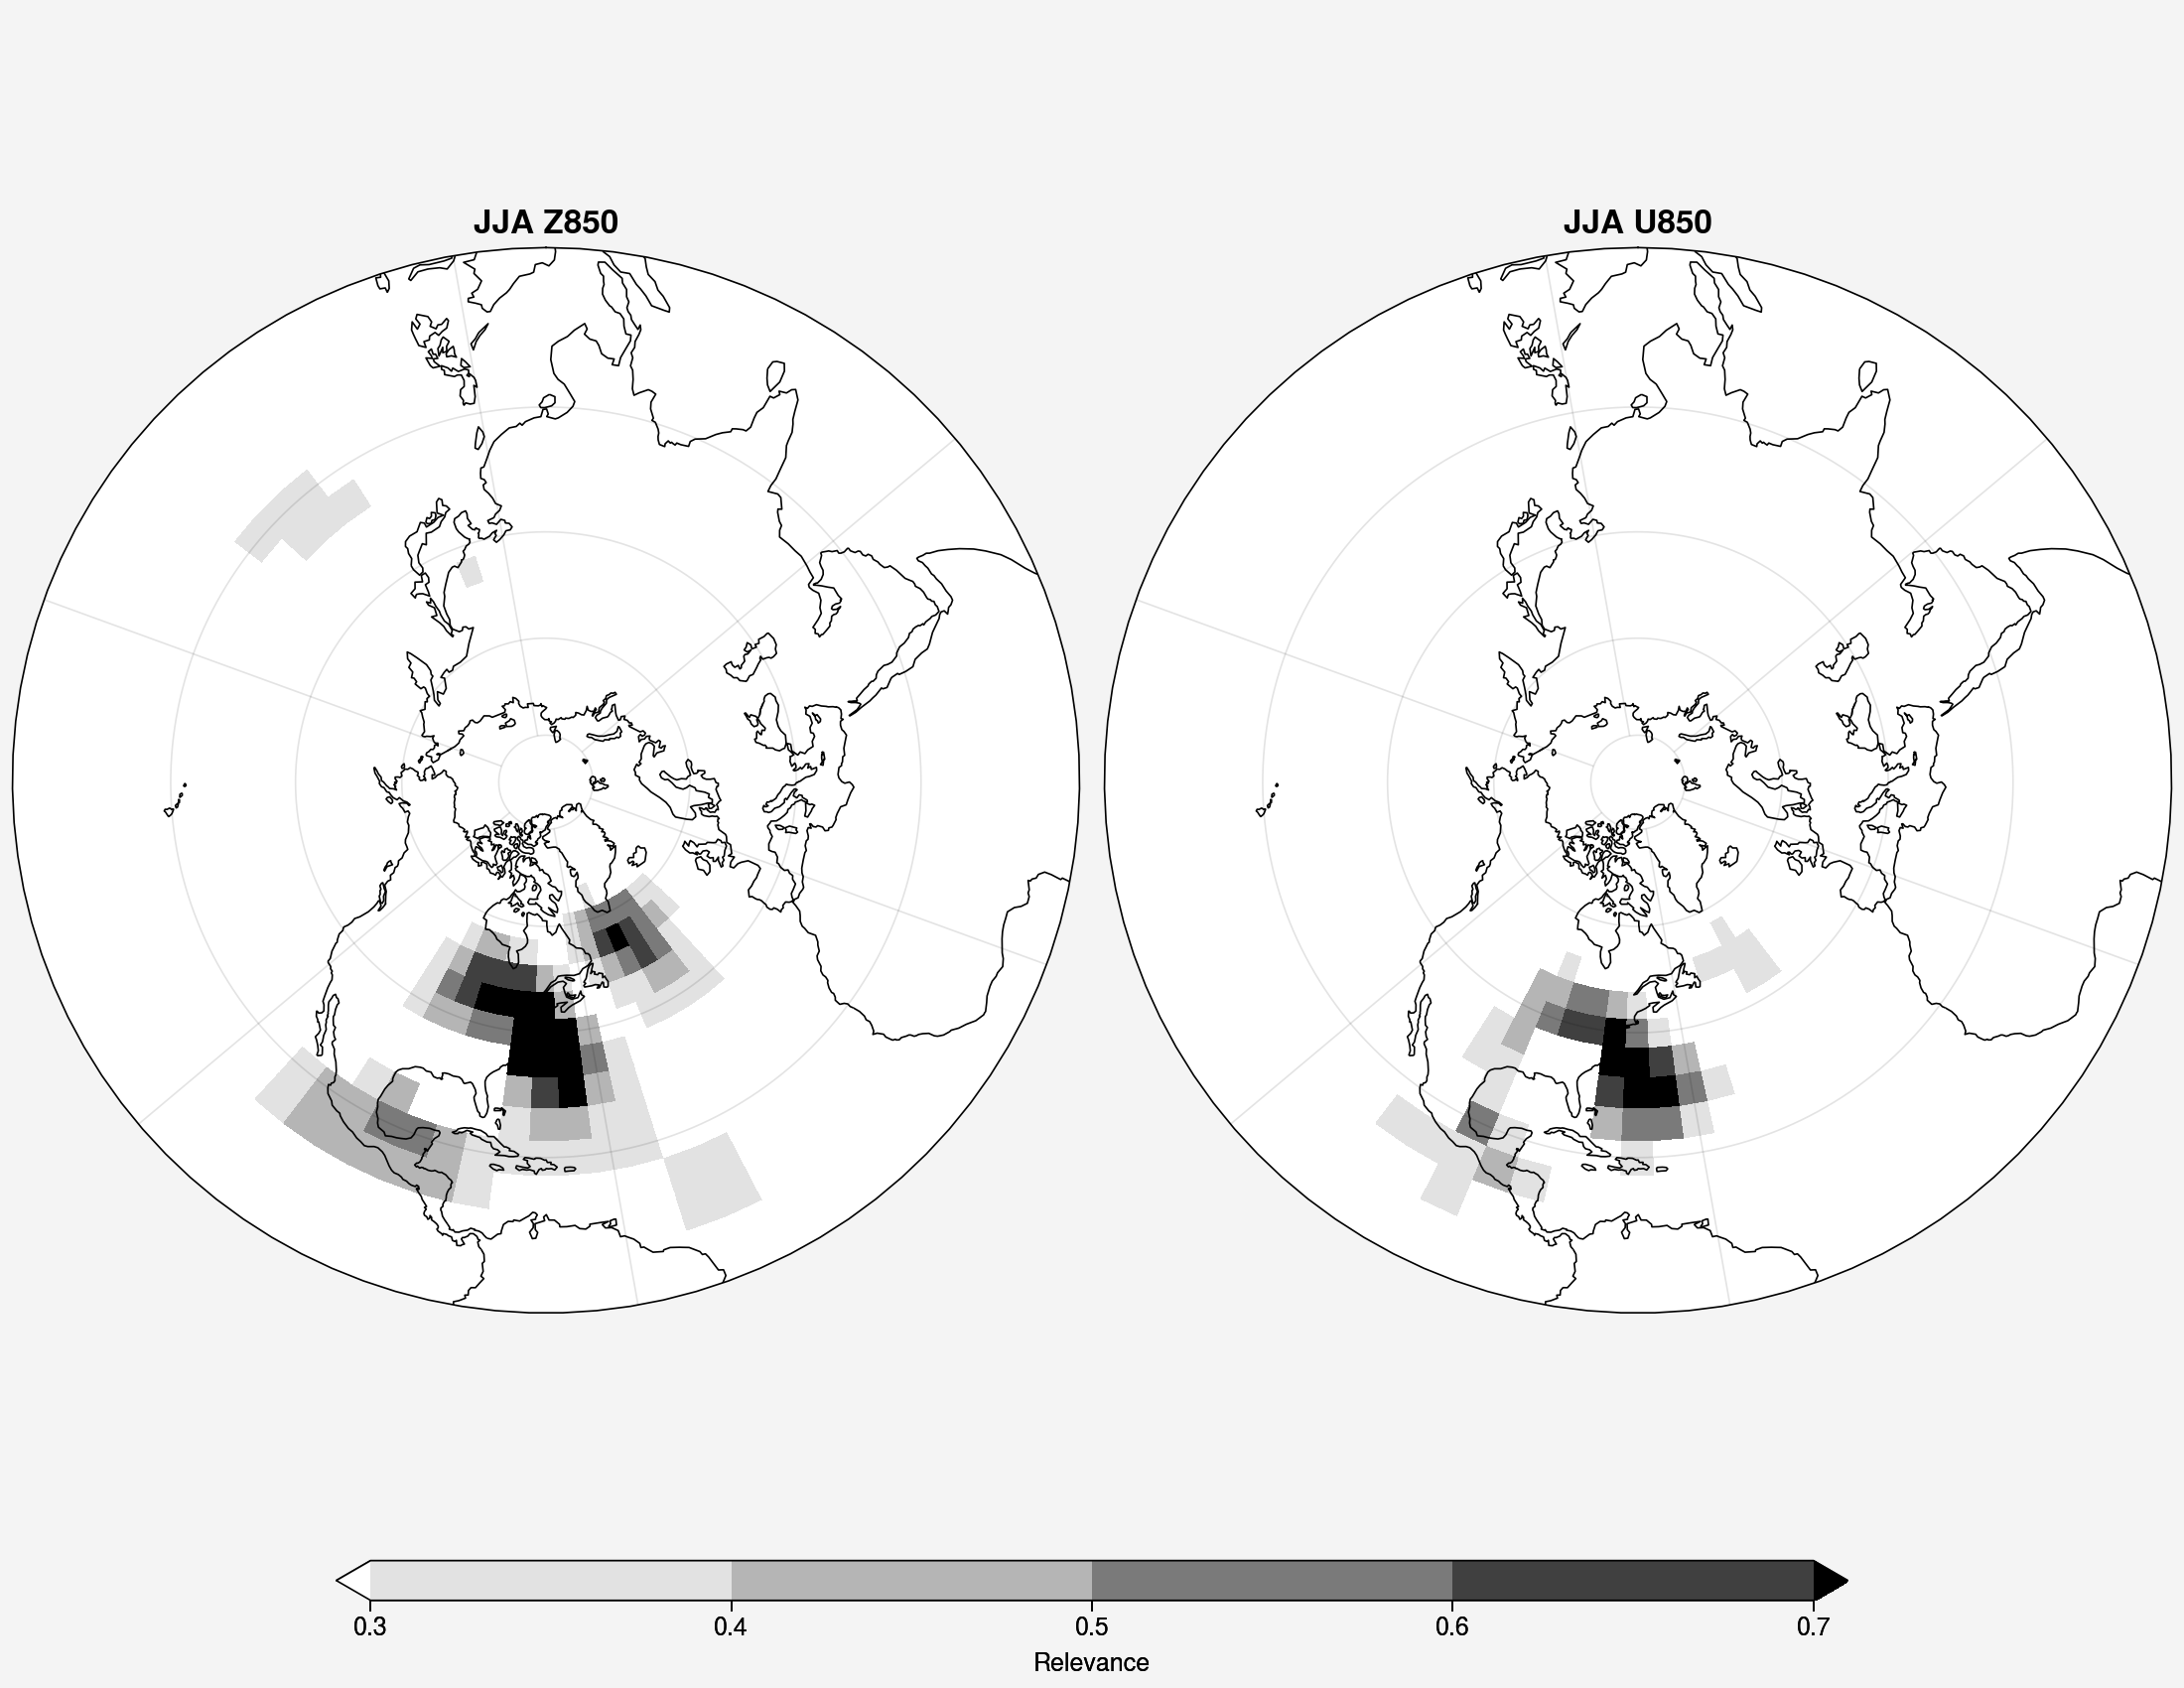

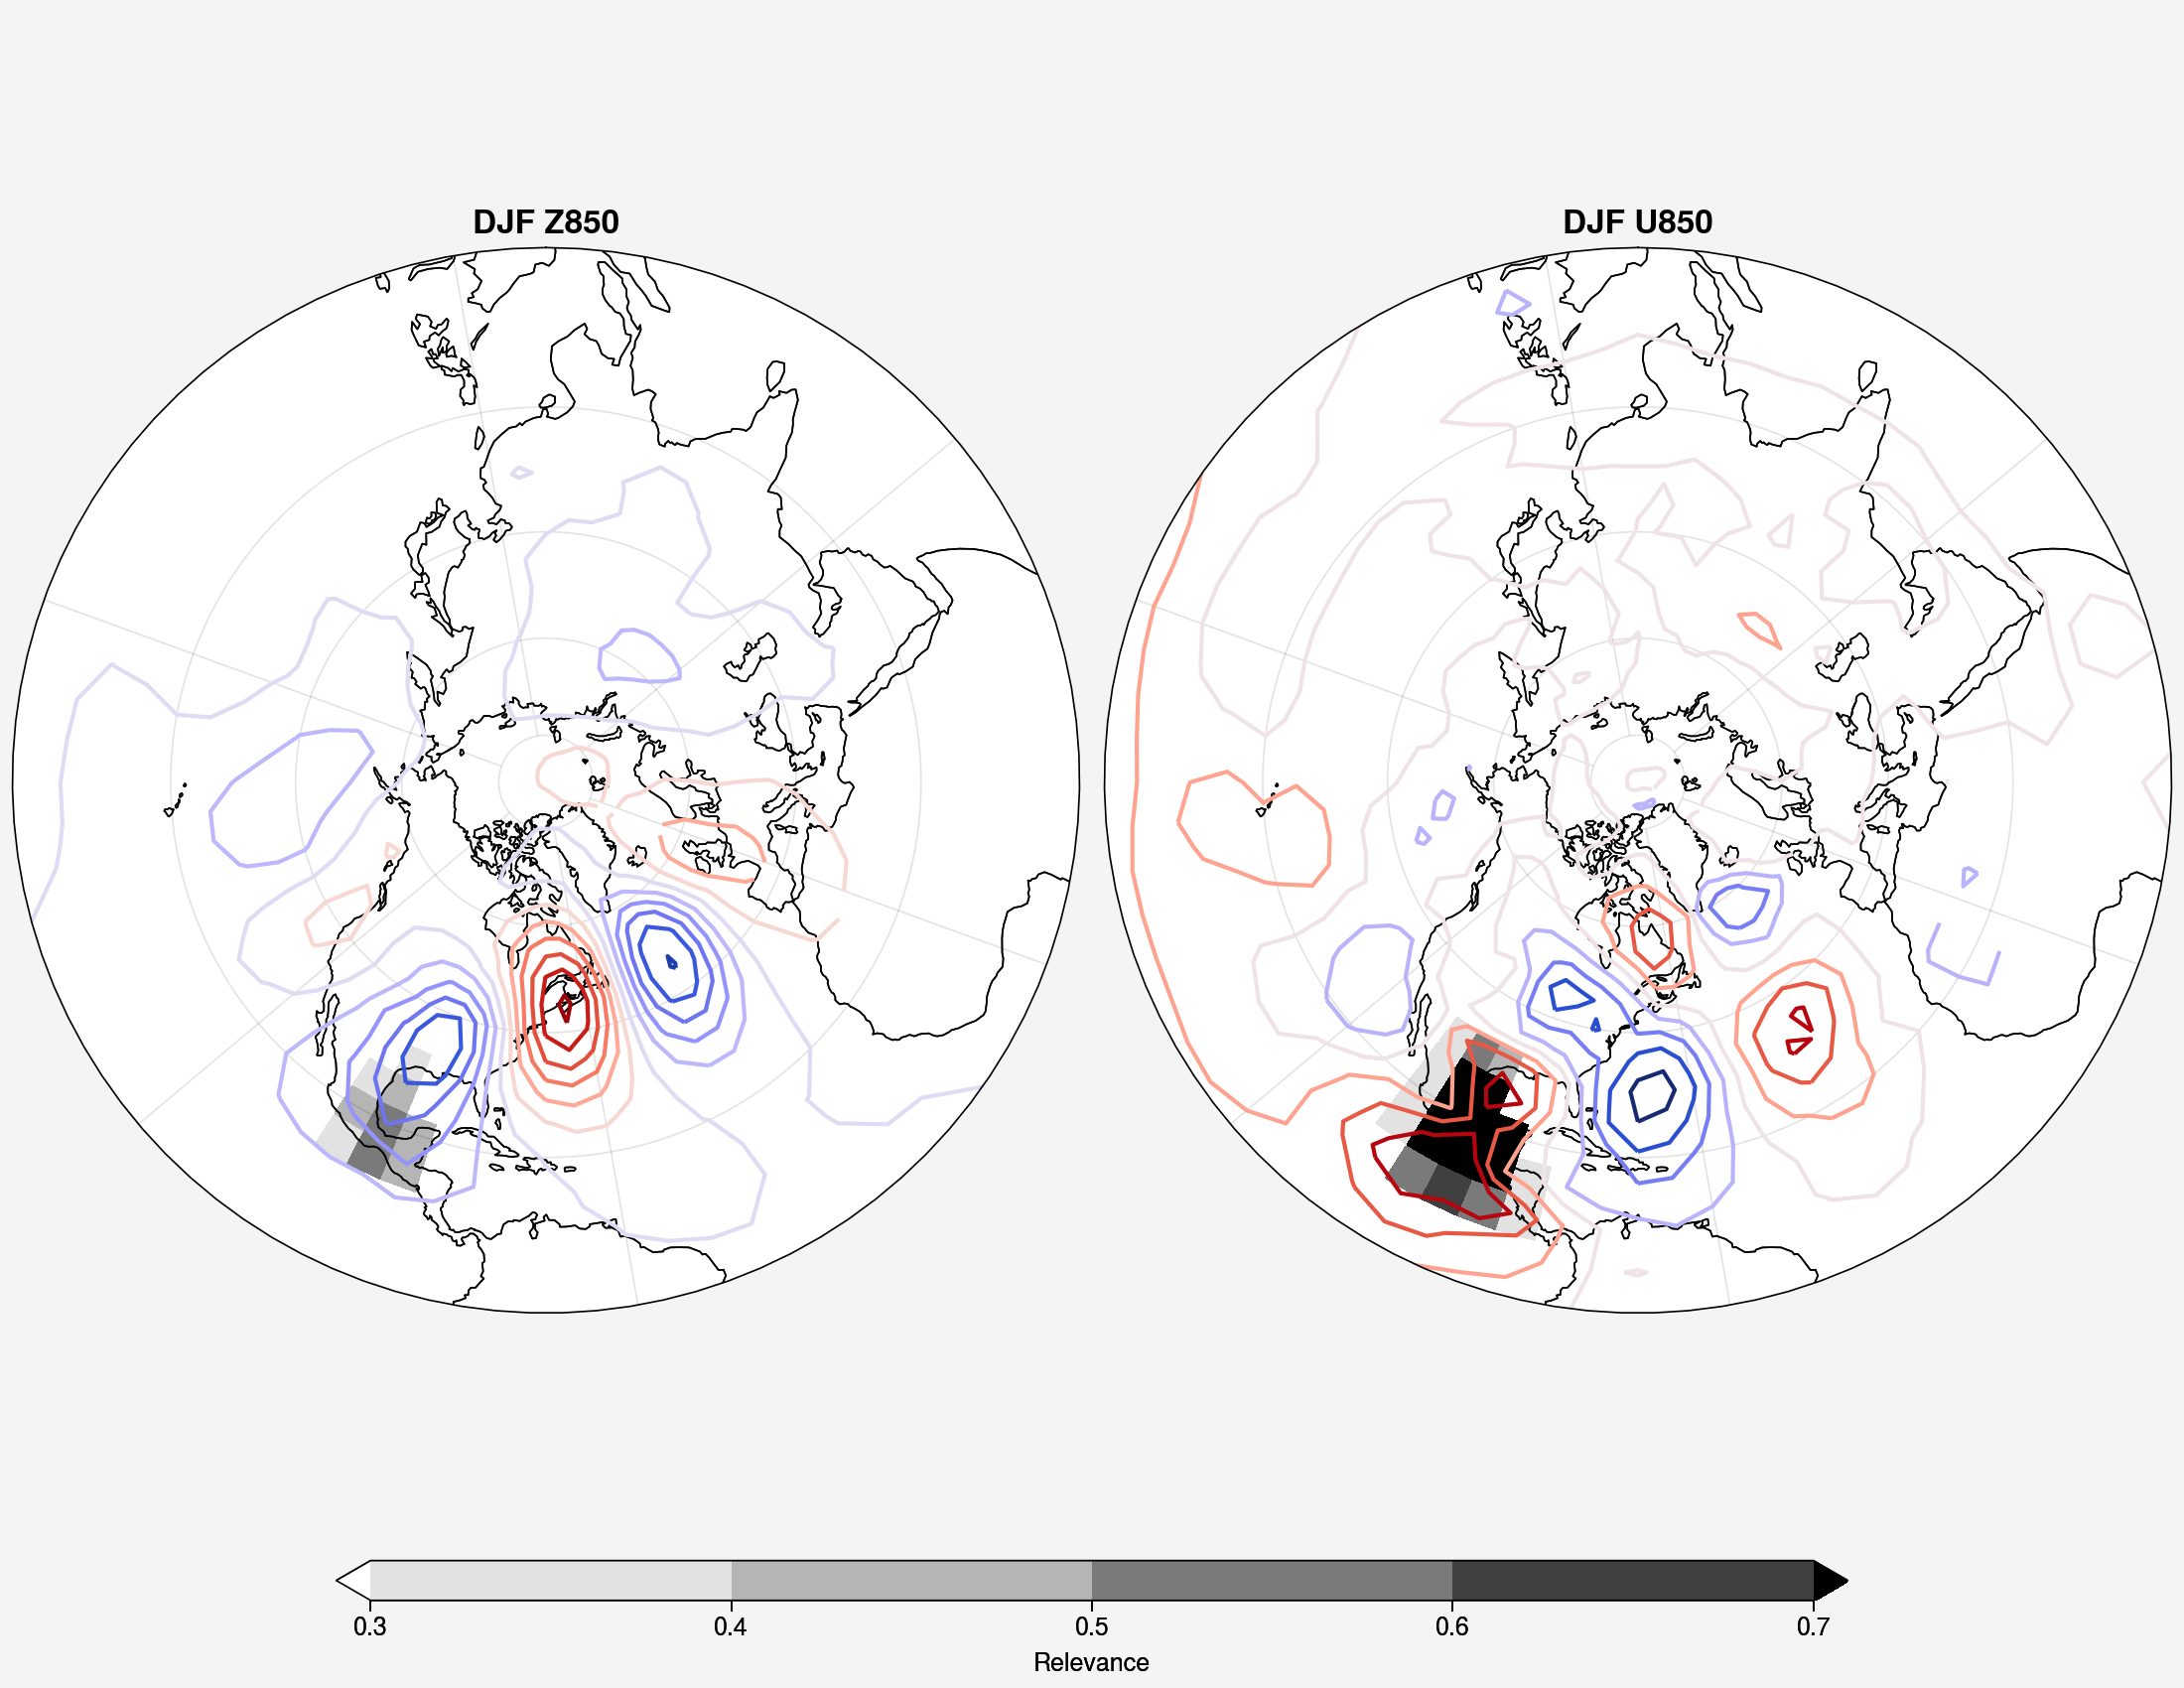

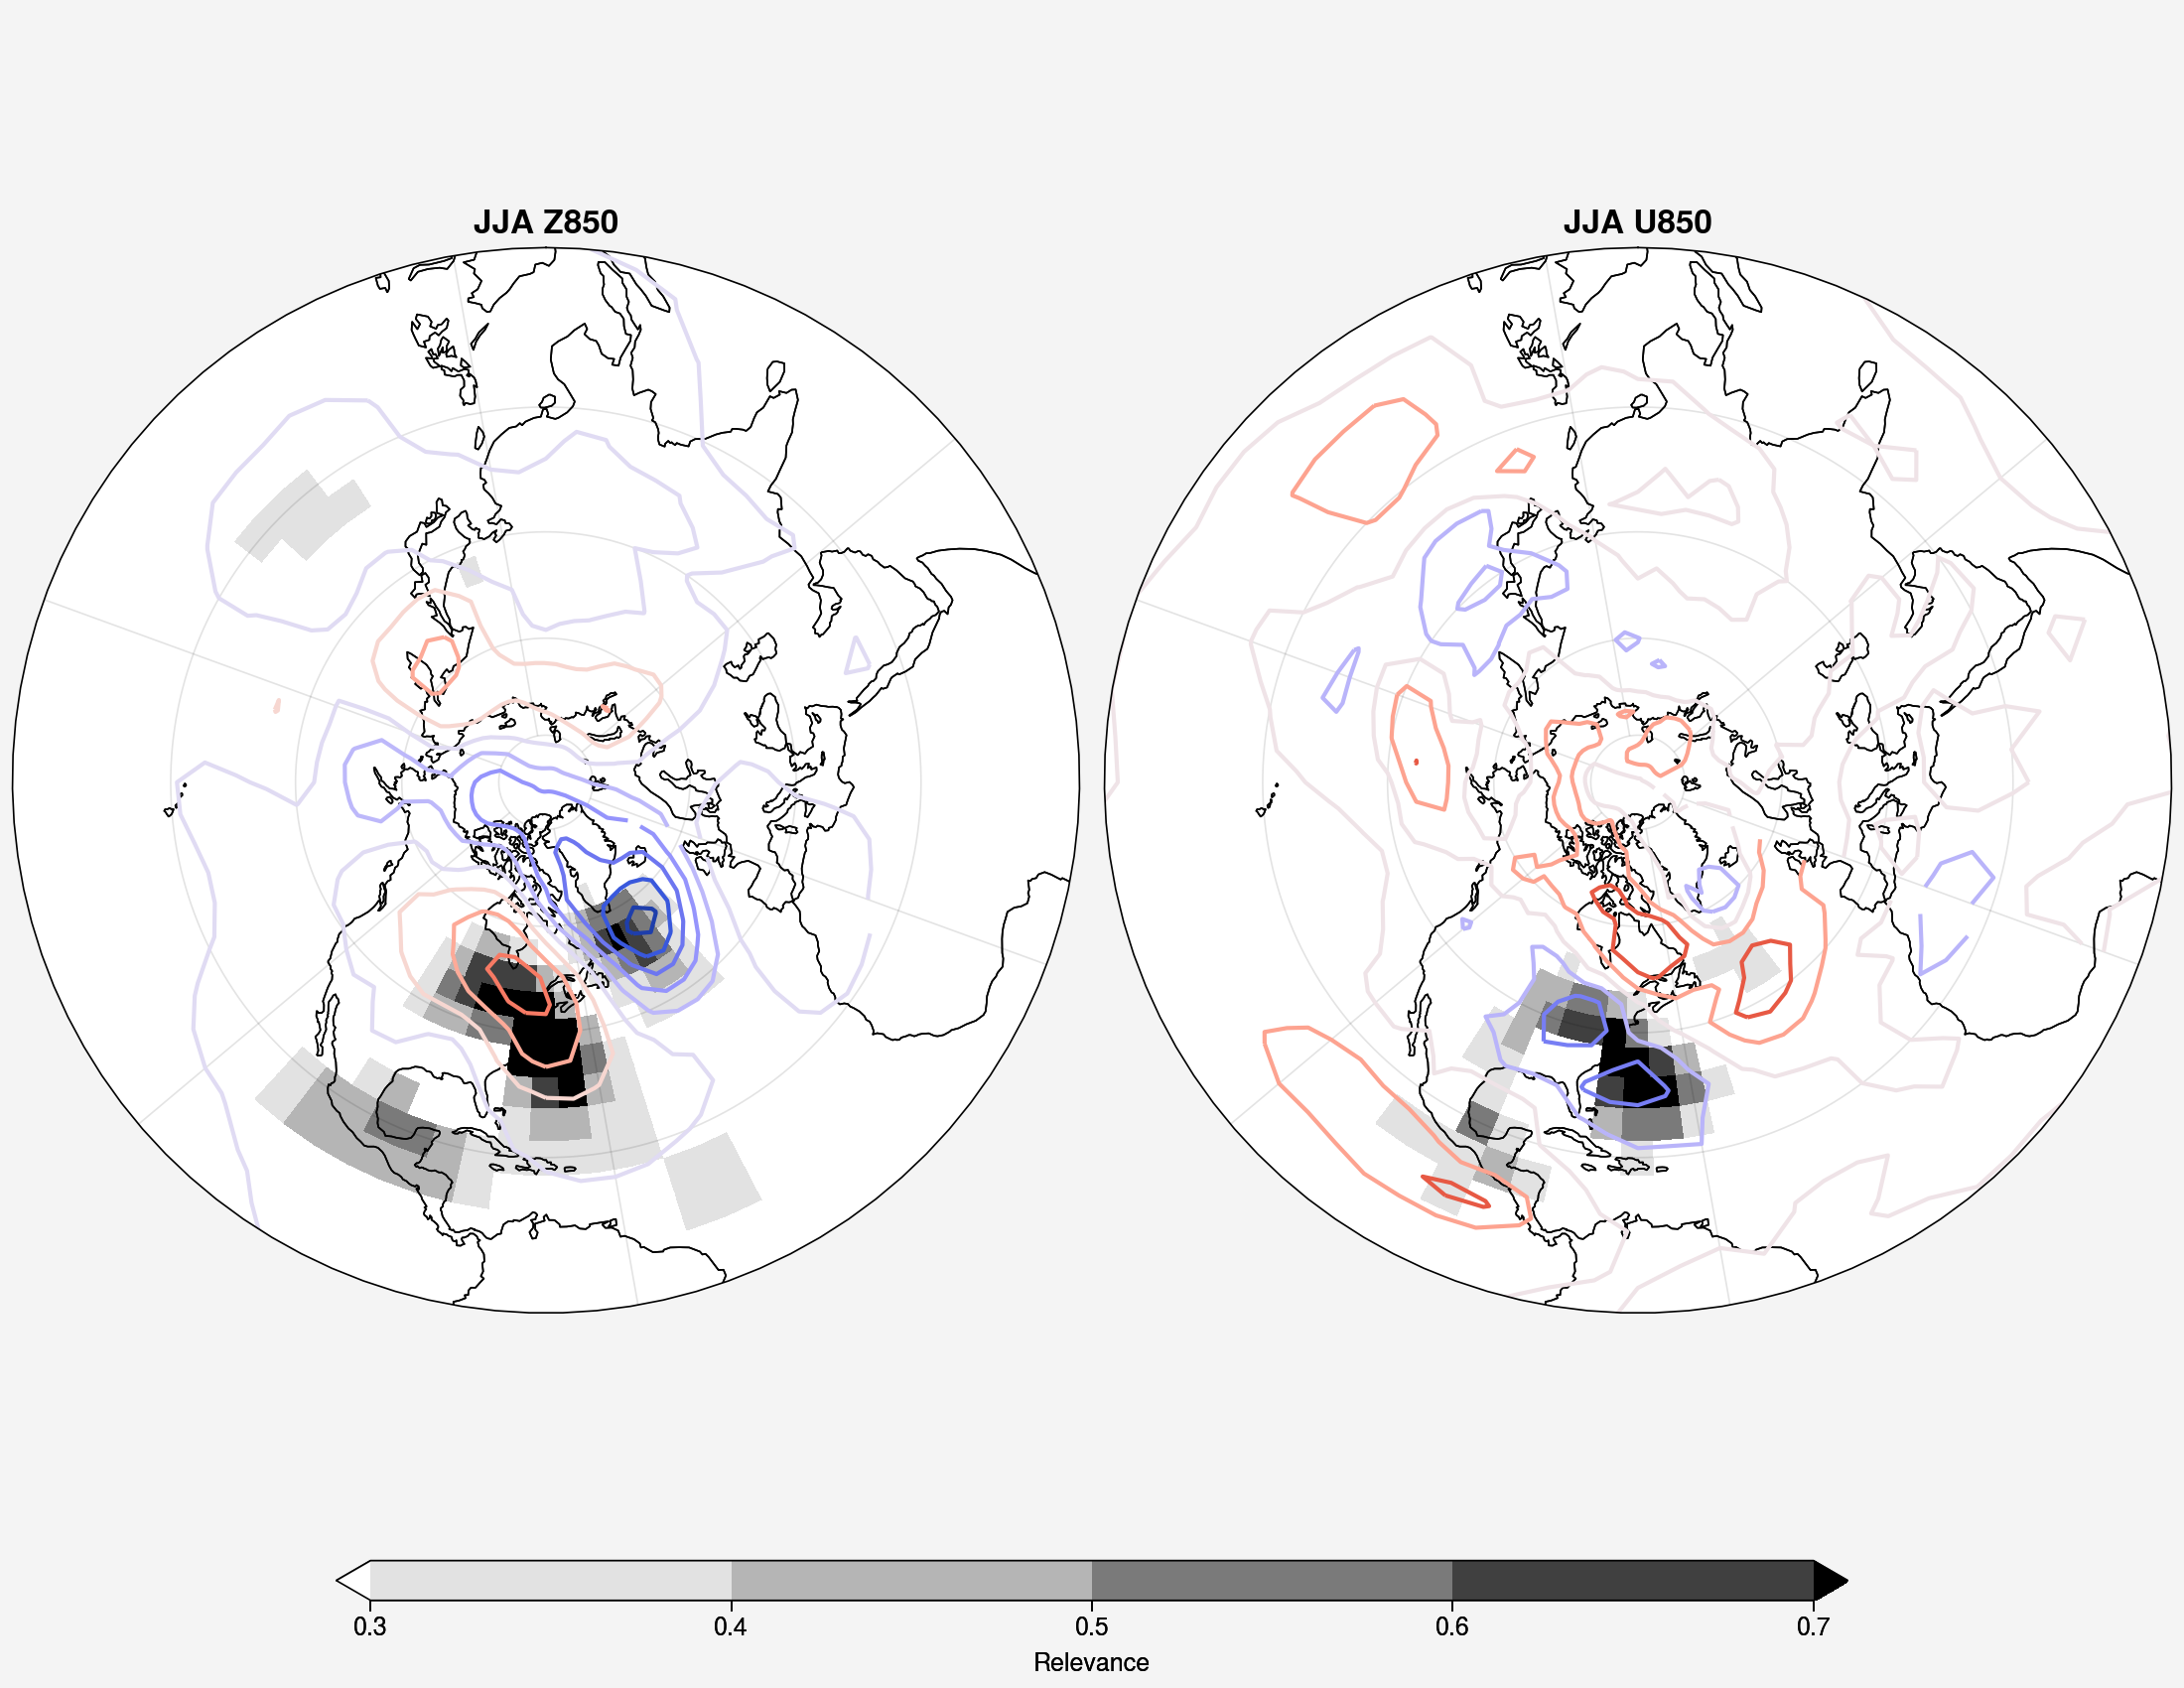

In [6]:
plotCompLRP850(lrp_norm['lrp'].sel(cat='Positive'),
               ds_comp.sel(cat='Positive'),
               file='')


plotCompCirc850(lrp_norm['lrp'].sel(cat='Positive'),
                ds_comp.sel(cat='Positive'),
                file='')